In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date
import numpy as np
#import geopandas as geo
import folium

In [2]:
ACS =  DataLoaders.ACSData(2016,'block_group')

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('geoid','columns',inplace =True)


Index(['state', 'tot_population', 'in_poverty', 'inc_pct_poverty',
       'inc_pcincome', 'race_pct_white', 'race_pct_whitenh',
       'race_pct_nonwhite', 'race_pct_nonwhitenh', 'race_pct_black',
       ...
       'house_w_both_2_mort_and_loan', 'house_no_mort', 'disability_pct',
       'snap_past_12_mo', 'median_year_built', 'single_unit_home',
       'multi_unit_home', 'mobile_home', 'boat_van_rv_home',
       'spanish_speaking'],
      dtype='object', length=140)
Index(['state', 'tot_population', 'in_poverty', 'inc_pct_poverty',
       'inc_pcincome', 'race_pct_white', 'race_pct_whitenh',
       'race_pct_nonwhite', 'race_pct_nonwhitenh', 'race_pct_black',
       ...
       'house_yr_pct_before_1960', 'house_yr_pct_after_2000',
       'house_yr_pct_1960_2000', 'house_val_less_50K', 'house_val_50_100K',
       'house_val_100K_300K', 'house_val_300K_500K', 'house_val_more_500K',
       'race_pct_black_or_amind', 'pct_alt_heat'],
      dtype='object', length=106)


In [3]:
ACS.data.columns

Index(['state', 'tot_population', 'in_poverty', 'inc_pct_poverty',
       'inc_pcincome', 'race_pct_white', 'race_pct_whitenh',
       'race_pct_nonwhite', 'race_pct_nonwhitenh', 'race_pct_black',
       ...
       'house_yr_pct_before_1960', 'house_yr_pct_after_2000',
       'house_yr_pct_1960_2000', 'house_val_less_50K', 'house_val_50_100K',
       'house_val_100K_300K', 'house_val_300K_500K', 'house_val_more_500K',
       'race_pct_black_or_amind', 'pct_alt_heat'],
      dtype='object', length=106)

In [4]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:200: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  self.Load()


In [5]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [6]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [7]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:172: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:219: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)


217739
202783
Predicting 2017:
[09:34:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Feature ranking:
1. Max (0.391683)
2. Median (0.151015)
3. pct_alt_heat (0.088431)
4. house_pct_live_alone (0.077854)
5. race_pct_black_or_amind (0.076285)
6. house_yr_pct_before_1960 (0.072331)
7. did_not_work_past_12_mo (0.071676)
8. inc_pct_poverty (0.070725)


In [8]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

217739
202783
Predicting 2017:
[09:34:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking:
1. Median (0.342500)
2. Max (0.182375)
3. did_not_work_past_12_mo (0.082851)
4. race_pct_black_or_amind (0.080679)
5. pct_alt_heat (0.080051)
6. house_pct_live_alone (0.078125)
7. house_yr_pct_before_1960 (0.077756)
8. inc_pct_poverty (0.075663)


In [9]:
ARC =  DataLoaders.ARCPData()

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '_')
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '_')


In [10]:
ARC.data

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [11]:
SVI =  DataLoaders.SVIData(ACS.data)
SVI.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [12]:
Smoke = SmokeAlarmModels()

-----Training_Performance------
102.20594974151226
Test RMSE: 10.109695828337877
Test MAE: 7.566051847422965


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


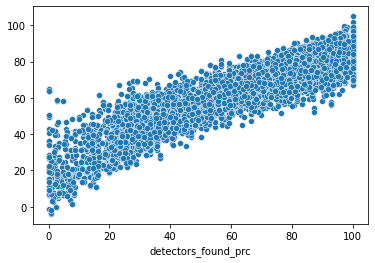

-----Test Performance ----- 
Test RMSE: 12.775512175218047
Test MAE: 9.54890478956905


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


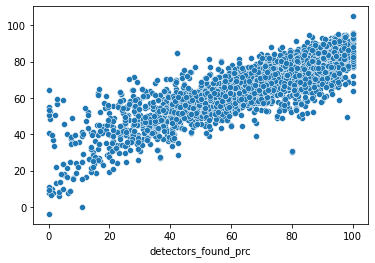

Test Correlation: (0.8337250243722903, 0.0)
Test R-squared: 0.6625108755618851

 Feature ranking:
1. RPL_THEME1 (0.277249)
2. RPL_THEME3 (0.184130)
3. RPL_THEME2 (0.174729)
4. RPL_THEME4 (0.174106)
5. Population Density (per square mile), 2010 (0.145658)
6. inc_pct_poverty (0.044128)


In [13]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS,SVI, ACS_cols_to_use,svi_use, utils.DATA['data'])

In [14]:
smoke_prediction

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract,Predictions,"Population Density (per square mile), 2010"
geoid,,,,,,,,,,,
010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group,01013953400,43.492588,30.6
010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group,01013953400,42.764263,30.6
010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group,01073002303,66.110931,2370.0
010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group,01073003500,66.330521,978.9
010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group,01073003500,67.938789,978.9
...,...,...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100,70.725037,1.4
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100,70.725037,1.4
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300,74.866402,91.0


In [45]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017
geoid,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN
...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619


In [46]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]

In [47]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [48]:
out['smoke_detector_risk_frac'] =  1 - out['detectors_predicted'] / 100
out['smoke_detector_risk_score'] =  out['smoke_detector_risk_frac'].rank(pct=True)
out[['smoke_detector_risk_frac','smoke_detector_risk_score']]

,smoke_detector_risk_frac,smoke_detector_risk_score
GEOID,,
010010201001,0.221310,0.279082
010010201002,0.227939,0.299097
010010202001,0.290242,0.498115
010010202002,0.285702,0.484020
010010203001,0.269391,0.431521
...,...,...
560459511001,0.292750,0.506260
560459511002,0.292750,0.506260
560459513001,0.251336,0.372777


In [49]:
# add final invidual predictors 

out['SVI_Theme_1'] = SVI.data['RPL_THEME1'].replace(-999.0, np.NaN)

out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,1]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,1]



In [50]:
# create and add final predictor 

out['CombinedRiskScore'] =  out.loc[:,['smoke_detector_risk_score',
                                       'SVI_Theme_1',
                                       'fire_propensity_risk_score',
                                       'fire_severity_risk_score'] ].mean(axis = 1,
                                                                          skipna = True) #False )

In [21]:
out['CombinedRiskScore'].describe()

count    217739.000000
mean          0.409792
std           0.212337
min           0.003074
25%           0.245763
50%           0.391767
75%           0.551518
max           0.992650
Name: CombinedRiskScore, dtype: float64

In [22]:
out.columns

Index(['fires_per_1K_pop_2009', 'fires_per_1K_pop_2010',
       'fires_per_1K_pop_2011', 'fires_per_1K_pop_2012',
       'fires_per_1K_pop_2013', 'fires_per_1K_pop_2014',
       'fires_per_1K_pop_2015', 'fires_per_1K_pop_2016',
       'fires_per_1K_pop_2017', 'recorded_home_visits',
       'detectors_working_prc', 'detectors_working_CI', 'geography',
       'Population Density (per square mile), 2010', 'detectors_predicted',
       'smoke_detector_risk_frac', 'smoke_detector_risk_score', 'SVI_Theme_1',
       'fire_propensity_risk_score', 'fire_severity_risk_score',
       'CombinedRiskScore'],
      dtype='object')

In [51]:
out_name = f"CombinedModels-basic{date.today()}.csv"
out_save = out.copy()
out_save.index = '#_' + out_save.index
out_save.to_csv(utils.DATA['model-outputs'] / out_name)

In [ ]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100

In [52]:
out_columns = ['state','NFIRS_start','NFIRS_end','years_fires_reported','total_fires_reported', 'max_fires_1k', 
               'median_fires_1k','total_fires_reported_sev', 'max_fires_1k_sev', 'median_Fires_1k_sev',
               'fire_propensity_risk_score','fire_severity_risk_score','recorded_home_visits',
              'smoke_detector_risk_frac', 'smoke_detector_risk_score','geography', 'SVI_Theme_1','CombinedRiskScore',
              'did_not_work_past_12_mo_sum', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
               'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
               'inc_hhmedian', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
               'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
               'age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
               'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking']

In [53]:
out['NFIRS_start'] = min(FSM.years)
out['NFIRS_start'] = out['NFIRS_start'].astype(int)
out['NFIRS_end'] = max(FSM.years)
out['NFIRS_end'] = out['NFIRS_end'].astype(int)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_frac,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,504.8,77.869019,0.221310,0.279082,0.3913,0.109424,0.493663,0.318367,2012,2016
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,504.8,77.206116,0.227939,0.299097,0.3913,0.065521,0.015588,0.192876,2012,2016
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,1682.5,70.975792,0.290242,0.498115,0.7065,0.258691,0.764298,0.556901,2012,2016
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,1682.5,71.429787,0.285702,0.484020,0.7065,0.184831,0.197458,0.393202,2012,2016
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,1633.1,73.060883,0.269391,0.431521,0.5659,0.002488,0.003415,0.250831,2012,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,1.4,70.725037,0.292750,0.506260,0.3925,0.608018,0.579069,0.521462,2012,2016
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,1.4,70.725037,0.292750,0.506260,0.3925,0.169665,0.444465,0.378222,2012,2016
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,91.0,74.866402,0.251336,0.372777,0.5093,0.082466,0.692106,0.414162,2012,2016


In [33]:
fires_trained = NFIRS.fires[FSM.years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k']
fires_trained2

C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


geoid
010010201001    1.342282
010010201002    1.185771
010010202001    1.047120
010010202002    0.944287
010010203001    0.423012
                  ...   
560459511001    1.372684
560459511002    0.632111
560459513001    0.868810
560459513002    0.970874
560459513003    0.625391
Name: median_fires_1k, Length: 202783, dtype: float64

In [54]:
fires_trained = NFIRS.fires_noAdjustment[FSM.years]
fires_trained2 = fires_trained>0
fires_trained2['years_fires_reported']= fires_trained2.sum(axis = 1)
fires_trained2 = fires_trained2['years_fires_reported']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires_noAdjustment[FSM.years]
fires_trained['total_fires_reported'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[FSM.years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[FSM.years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: All-NaN axis encountered
  del sys.path[0]
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-Na

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.3913,0.109424,0.493663,0.318367,2012,2016,1.0,1.0,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.3913,0.065521,0.015588,0.192876,2012,2016,4.0,6.0,1.581028,1.185771
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.7065,0.258691,0.764298,0.556901,2012,2016,4.0,4.0,1.047120,1.047120
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.7065,0.184831,0.197458,0.393202,2012,2016,3.0,3.0,0.944287,0.944287
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.5659,0.002488,0.003415,0.250831,2012,2016,5.0,8.0,1.269036,0.423012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.3925,0.608018,0.579069,0.521462,2012,2016,1.0,2.0,1.372684,1.372684
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.3925,0.169665,0.444465,0.378222,2012,2016,1.0,1.0,0.632111,0.632111
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.5093,0.082466,0.692106,0.414162,2012,2016,2.0,2.0,0.868810,0.868810


In [55]:
fires_trained = NFIRS_Sev.fires[FSM.years]
fires_trained['total_fires_reported_sev'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported_sev']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[FSM.years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[FSM.years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,median_fires_1k_sev
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.318367,2012,2016,1.0,1.0,1.342282,1.342282,1.342282,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.192876,2012,2016,4.0,6.0,1.581028,1.185771,1.581028,0.790514,0.790514
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.556901,2012,2016,4.0,4.0,1.047120,1.047120,1.047120,1.047120,1.047120
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.393202,2012,2016,3.0,3.0,0.944287,0.944287,0.000000,NaN,NaN
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.250831,2012,2016,5.0,8.0,1.269036,0.423012,1.692047,0.423012,0.423012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.521462,2012,2016,1.0,2.0,1.372684,1.372684,1.372684,1.372684,1.372684
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.378222,2012,2016,1.0,1.0,0.632111,0.632111,0.000000,NaN,NaN
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.414162,2012,2016,2.0,2.0,0.868810,0.868810,0.000000,NaN,NaN


In [57]:
ACS_toCombine = ACS.data
#check this makes sense
ACS_toCombine['inc_hhmedian'] = ACS_toCombine['inc_pcincome']*ACS_toCombine['tot_population']/ACS_toCombine['house_tot_occ_cnt']
ACS_toCombine['inc_hhmedian'] = ACS_toCombine['inc_hhmedian'].round()
ACS_toCombine['race_pct_whiteh'] = ACS_toCombine['race_pct_white']-ACS_toCombine['race_pct_whitenh']
ACS_toCombine['race_pct_nwhitenh'] = 1-ACS_toCombine['race_pct_hisp']-ACS_toCombine['race_pct_whitenh']

ACS_keep = ACS_toCombine[['state',
    'did_not_work_past_12_mo_sum', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
    'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
    'inc_hhmedian', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
    'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
    'age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
    'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking'
    ]]

ACS_toCombine

,state,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,...,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat,Tract,geos,inc_hhmedian,race_pct_whiteh,race_pct_nwhitenh
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,AL,745.0,143.0,0.191946,20365.0,0.785235,0.763758,0.214765,0.236242,0.214765,...,0.508772,0.064327,0.000000,0.214765,0.017606,01001020100,010010201001,53422.0,0.021477,0.214765
010010201002,AL,1265.0,56.0,0.044269,33336.0,0.856126,0.826877,0.143874,0.173123,0.082213,...,0.538259,0.174142,0.034301,0.082213,0.032895,01001020100,010010201002,92478.0,0.029249,0.143874
010010202001,AL,955.0,365.0,0.382199,17047.0,0.376042,0.376042,0.623958,0.623958,0.591667,...,0.394737,0.065789,0.030702,0.591667,0.000000,01001020200,010010202001,42176.0,0.000000,0.610417
010010202002,AL,1059.0,118.0,0.111426,21400.0,0.497573,0.488673,0.502427,0.511327,0.461974,...,0.412752,0.020134,0.000000,0.461974,0.019912,01001020200,010010202002,50138.0,0.008900,0.499191
010010203001,AL,2364.0,100.0,0.042301,23106.0,0.626481,0.626481,0.373519,0.373519,0.217851,...,0.592920,0.000000,0.000000,0.227157,0.000000,01001020300,010010203001,66290.0,0.000000,0.277073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,WY,1457.0,137.0,0.094029,33781.0,0.950583,0.929307,0.049417,0.070693,0.000000,...,0.666019,0.091262,0.038835,0.000000,0.366569,56045951100,560459511001,72168.0,0.021277,0.049417
560459511002,WY,1582.0,99.0,0.062579,34002.0,0.935884,0.918642,0.064116,0.081358,0.009698,...,0.525000,0.232812,0.039062,0.014547,0.825737,56045951100,560459511002,72106.0,0.017241,0.062500
560459513001,WY,1151.0,301.0,0.261512,23326.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.466851,0.000000,0.000000,0.000000,0.105163,56045951300,560459513001,51335.0,0.000000,0.000000


In [58]:
out = out.merge(ACS_keep, how = 'left', left_index = True, right_index = True)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,race_pct_other,age_pct_under25,age_pct_over65,disability_pct,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.000000,0.363758,0.036242,0.239437,0.183099,0.820423,0.024648,0.154930,0.000000,0.102113
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.000000,0.348617,0.114625,0.278509,0.096491,0.925054,0.000000,0.074946,0.000000,0.046053
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.000000,0.372917,0.161458,0.458549,0.303109,0.768844,0.201005,0.030151,0.000000,0.000000
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.008091,0.303398,0.094660,0.280973,0.172566,0.821138,0.168699,0.010163,0.000000,0.011062
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.096447,0.302876,0.134095,0.379854,0.082524,0.995112,0.000000,0.004888,0.000000,0.037621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.000000,0.234043,0.175704,0.219941,0.054252,0.711035,0.053470,0.228669,0.006826,0.000000
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.000000,0.208513,0.215517,0.276139,0.010724,0.706250,0.000000,0.293750,0.000000,0.009383
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.000000,0.325804,0.076455,0.210325,0.172084,0.709910,0.054054,0.236036,0.000000,0.000000


In [59]:
out_final = out[out_columns]
out_final

,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,fire_propensity_risk_score,fire_severity_risk_score,recorded_home_visits,...,race_pct_other,age_pct_under25,age_pct_over65,disability_pct,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,AL,2012,2016,1.0,1.0,1.342282,1.342282,0.109424,0.493663,0,...,0.000000,0.363758,0.036242,0.239437,0.183099,0.820423,0.024648,0.154930,0.000000,0.102113
010010201002,AL,2012,2016,4.0,6.0,1.581028,1.185771,0.065521,0.015588,0,...,0.000000,0.348617,0.114625,0.278509,0.096491,0.925054,0.000000,0.074946,0.000000,0.046053
010010202001,AL,2012,2016,4.0,4.0,1.047120,1.047120,0.258691,0.764298,0,...,0.000000,0.372917,0.161458,0.458549,0.303109,0.768844,0.201005,0.030151,0.000000,0.000000
010010202002,AL,2012,2016,3.0,3.0,0.944287,0.944287,0.184831,0.197458,0,...,0.008091,0.303398,0.094660,0.280973,0.172566,0.821138,0.168699,0.010163,0.000000,0.011062
010010203001,AL,2012,2016,5.0,8.0,1.269036,0.423012,0.002488,0.003415,0,...,0.096447,0.302876,0.134095,0.379854,0.082524,0.995112,0.000000,0.004888,0.000000,0.037621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,WY,2012,2016,1.0,2.0,1.372684,1.372684,0.608018,0.579069,0,...,0.000000,0.234043,0.175704,0.219941,0.054252,0.711035,0.053470,0.228669,0.006826,0.000000
560459511002,WY,2012,2016,1.0,1.0,0.632111,0.632111,0.169665,0.444465,0,...,0.000000,0.208513,0.215517,0.276139,0.010724,0.706250,0.000000,0.293750,0.000000,0.009383
560459513001,WY,2012,2016,2.0,2.0,0.868810,0.868810,0.082466,0.692106,3,...,0.000000,0.325804,0.076455,0.210325,0.172084,0.709910,0.054054,0.236036,0.000000,0.000000


In [61]:
out_name = f"CombinedModels-FileStructureColumns-{date.today()}.csv"
out_final.index = '#_' + out_final.index
out_final.to_csv(utils.DATA['model-outputs'] / out_name)